In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("realtor-data.zip.csv")
data

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [4]:
data.tail(3)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [6]:
# Just cheching if there is any other data types

In [7]:
data.select_dtypes(exclude=['float', 'object'])

""
0
1
2
3
4
...
2226377
2226378
2226379
2226380


In [8]:
data[data.isna()]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.isna().sum().sum()

np.int64(2640112)

In [10]:
#dropping the unnecessary columns
data.drop(columns = ["brokered_by", "zip_code", "prev_sold_date"], inplace = True)

In [11]:
data.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state',
       'house_size'],
      dtype='object')

In [12]:
data.isna().sum().sum()

np.int64(1900983)

In [13]:
#dropping empty columns
data.dropna(inplace=True)

In [14]:
data.isna().sum().sum()

np.int64(0)

In [15]:
data.head(3)

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0


In [16]:
data[data.duplicated()]

,status,price,bed,bath,acre_lot,street,city,state,house_size
3703,for_sale,1390000.0,3.0,5.0,14.48,1685783.0,Williamsburg,Massachusetts,3112.0
10417,for_sale,99000.0,2.0,1.0,5.00,1977450.0,Red Hook,New York,916.0
14710,for_sale,575000.0,9.0,3.0,0.07,117325.0,Warren,Rhode Island,3012.0
19532,for_sale,399000.0,2.0,1.0,0.99,1527806.0,Rochester,Massachusetts,1091.0
26753,for_sale,750000.0,3.0,3.0,1.03,1230106.0,York,Maine,1843.0
...,...,...,...,...,...,...,...,...,...
2108206,sold,499000.0,3.0,3.0,0.24,1545436.0,Lake Arrowhead,California,2512.0
2161599,sold,479000.0,2.0,2.0,2.39,688995.0,Middletown,California,1152.0
2199910,sold,689950.0,2.0,2.0,0.02,350217.0,Seattle,Washington,1029.0
2203665,sold,1897000.0,3.0,3.0,0.48,1146365.0,Sammamish,Washington,3040.0


In [17]:
data.drop_duplicates(inplace = True)

In [18]:
Counter(data.duplicated())

Counter({False: 1355862})

In [19]:
data.head()

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0


In [20]:
data["status"].value_counts()

status
for_sale    747459
sold        608403
Name: count, dtype: int64

In [21]:
data.shape

(1355862, 9)

In [22]:
747459 + 608403

1355862

In [23]:
len(data["state"].value_counts())

54

In [24]:
data["state"].value_counts().sort_values(ascending = False)

state
California              170550
Texas                   145188
Florida                 126328
Arizona                  54475
Pennsylvania             51847
New York                 50697
Georgia                  49134
Illinois                 46640
Washington               46336
Virginia                 44159
Ohio                     41147
North Carolina           37329
Maryland                 32927
Minnesota                32682
Missouri                 30071
Massachusetts            28051
Oklahoma                 26824
Michigan                 22092
Oregon                   21854
Colorado                 19527
New Jersey               19453
Wisconsin                18427
Tennessee                18288
South Carolina           17176
Iowa                     16492
Kentucky                 15718
Alabama                  14674
Louisiana                14467
New Mexico               11822
Idaho                    11556
Indiana                  11508
Kansas                   11207
Ar

In [25]:
top_10_states = data["state"].value_counts().sort_values(ascending = False).head(20)

<Axes: xlabel='state'>

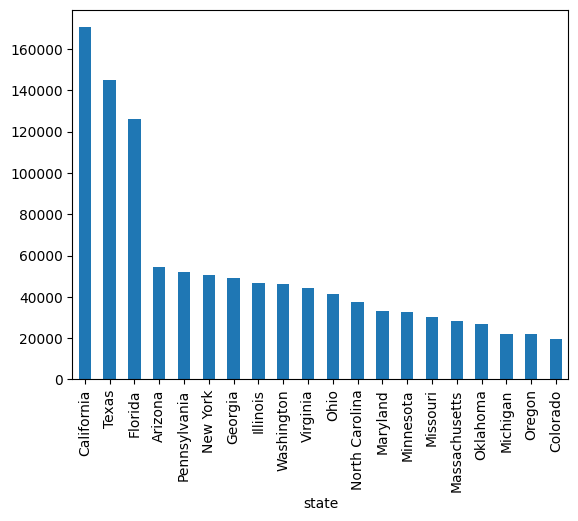

In [26]:
# visualizing
top_10_states.plot(kind="bar")

In [27]:
others = data["state"].value_counts().sum() - data["state"].value_counts().sort_values(ascending = False).head(20).sum()
others

np.int64(278004)

In [28]:
top_10_states["Others"] = others

<Axes: xlabel='state'>

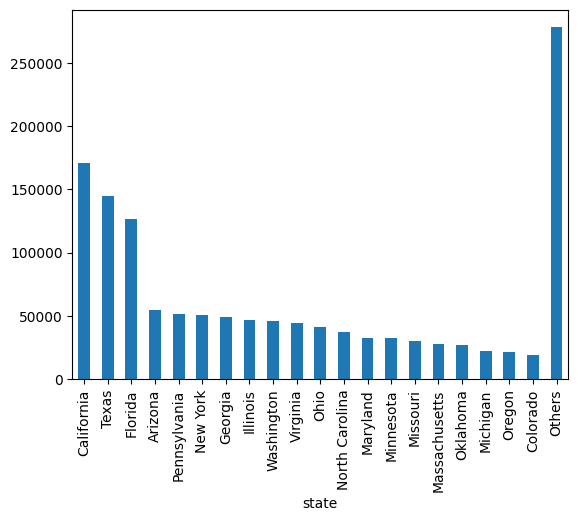

In [29]:
# visualizing the remaining states as others
top_10_states.plot(kind="bar")

Text(0.5, 0, 'States')

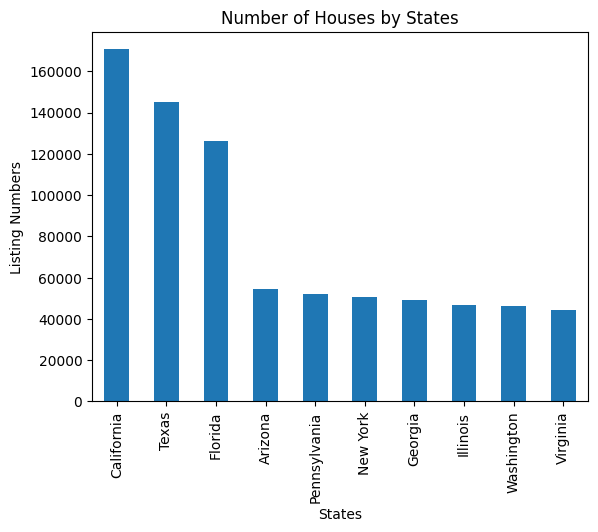

In [30]:
data["state"].value_counts().sort_values(ascending = False).head(10).plot(kind="bar")
plt.title("Number of Houses by States")
plt.ylabel("Listing Numbers")
plt.xlabel("States")

In [31]:
# grouping the states according to the average price
data.groupby("state")["price"].mean().sort_values(ascending=False)

state
Virgin Islands          1.947522e+06
Hawaii                  1.491548e+06
District of Columbia    1.209650e+06
California              1.107572e+06
Colorado                9.524866e+05
Utah                    9.145312e+05
Montana                 8.628151e+05
Connecticut             7.904887e+05
Massachusetts           7.542303e+05
Nevada                  7.514397e+05
Washington              7.274790e+05
Wyoming                 7.195811e+05
Guam                    7.175042e+05
Idaho                   6.898155e+05
New York                6.575570e+05
Florida                 6.499774e+05
Oregon                  6.451609e+05
New Hampshire           6.409913e+05
Puerto Rico             6.322105e+05
Vermont                 5.579320e+05
Arizona                 5.528911e+05
Virginia                5.462748e+05
Alaska                  5.412884e+05
New Jersey              5.411319e+05
Maine                   5.178919e+05
Rhode Island            5.110947e+05
Maryland                5.028899

In [32]:
# Changing the scintific number to intt cuz it is hard to understand

data.groupby("state")["price"].mean().sort_values(ascending=False).astype(int)

state
Virgin Islands          1947522
Hawaii                  1491548
District of Columbia    1209649
California              1107572
Colorado                 952486
Utah                     914531
Montana                  862815
Connecticut              790488
Massachusetts            754230
Nevada                   751439
Washington               727478
Wyoming                  719581
Guam                     717504
Idaho                    689815
New York                 657557
Florida                  649977
Oregon                   645160
New Hampshire            640991
Puerto Rico              632210
Vermont                  557932
Arizona                  552891
Virginia                 546274
Alaska                   541288
New Jersey               541131
Maine                    517891
Rhode Island             511094
Maryland                 502889
South Carolina           485025
Tennessee                485018
Texas                    450757
South Dakota             440008
No

In [33]:
data.groupby("city")["price"].mean().sort_values(ascending = False).astype(int)

city
International      2147483600
Bolingbroke          45250000
Bal Harbour          26585714
Gulf Stream          21461250
Woody Creek          20987500
                      ...    
Otter Rock              10033
Midwest                 10000
Center Junction          8500
Rowan                    7500
Pilot Mound              6500
Name: price, Length: 17114, dtype: int64

In [34]:
# for multi index groupby
data.groupby(["state", "city"])["price"].mean()

state    city      
Alabama  Abbeville     2.201540e+05
         Adamsville    1.384411e+05
         Addison       1.459500e+05
         Adger         1.743727e+05
         Akron         4.389400e+05
                           ...     
Wyoming  Wheatland     2.815783e+05
         Wilson        5.719900e+06
         Worland       2.889077e+05
         Wright        2.911600e+05
         Yoder         3.406667e+05
Name: price, Length: 26260, dtype: float64

In [35]:
# to see as pandas dataframe
# to visualize just the price as int

temp_data = data.groupby(["state", "city"])["price"].mean().reset_index()
temp_data["price"] = temp_data["price"].astype(int)
temp_data

,state,city,price
0,Alabama,Abbeville,220154
1,Alabama,Adamsville,138441
2,Alabama,Addison,145950
3,Alabama,Adger,174372
4,Alabama,Akron,438940
...,...,...,...
26255,Wyoming,Wheatland,281578
26256,Wyoming,Wilson,5719900
26257,Wyoming,Worland,288907
26258,Wyoming,Wright,291160


In [36]:
# find the correlation coefficient

data.select_dtypes(include=["number"]).corr()["price"]

price         1.000000
bed           0.117585
bath          0.208868
acre_lot      0.005304
street        0.000481
house_size    0.073849
Name: price, dtype: float64

<Axes: >

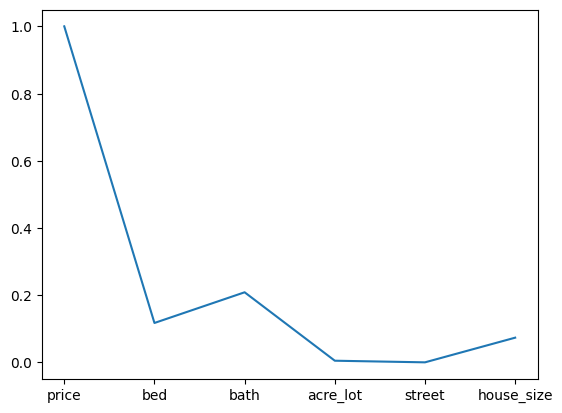

In [37]:
data.select_dtypes(include=["number"]).corr()["price"].plot(kind="line")

In [38]:
data

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [39]:
x = data[["bed", "bath", "house_size"]]
x

,bed,bath,house_size
0,3.0,2.0,920.0
1,4.0,2.0,1527.0
2,2.0,1.0,748.0
3,4.0,2.0,1800.0
5,4.0,3.0,2520.0
...,...,...,...
2226377,4.0,2.0,3600.0
2226378,3.0,2.0,1616.0
2226379,6.0,3.0,3200.0
2226380,2.0,1.0,933.0


In [40]:
y = data["price"]
y

0          105000.0
1           80000.0
2           67000.0
3          145000.0
5          179000.0
             ...   
2226377    359900.0
2226378    350000.0
2226379    440000.0
2226380    179900.0
2226381    580000.0
Name: price, Length: 1355862, dtype: float64

In [41]:
# we have to scale the data to avoid error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

([<matplotlib.patches.Wedge at 0x18e0112f9e0>,
 [Text(-0.8899178141142381, 0.646564988320692, ''),
  Text(0.8899177164856308, -0.6465651226945361, '')])

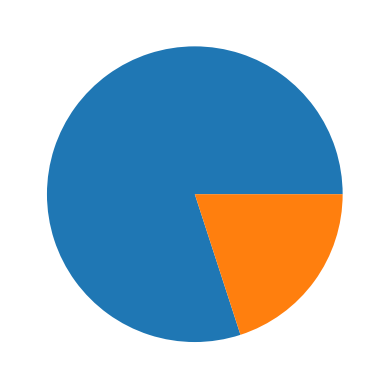

In [42]:
plt.pie([len(y_train),len(y_test)])

In [43]:
scaler = StandardScaler()

In [44]:
x_train

,bed,bath,house_size
259993,2.0,2.0,960.0
101749,3.0,2.0,1463.0
1861025,3.0,2.0,1254.0
1221782,4.0,2.0,2476.0
307065,4.0,4.0,3250.0
...,...,...,...
1755618,3.0,3.0,1431.0
770311,3.0,1.0,910.0
2184532,3.0,2.0,1986.0
1342857,4.0,3.0,2039.0


![Screenshot 2024-09-22 152858.png](<attachment:Screenshot 2024-09-22 152858.png>)
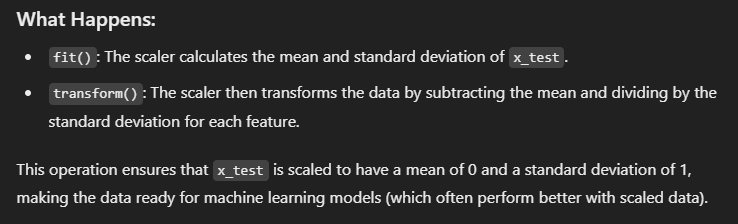

In [45]:
x_train = scaler.fit_transform(x_train)

In [46]:
x_train

array([[-0.95647586, -0.39434905, -0.25654877],
       [-0.26629935, -0.39434905, -0.14561362],
       [-0.26629935, -0.39434905, -0.19170795],
       ...,
       [-0.26629935, -0.39434905, -0.03026752],
       [ 0.42387715,  0.33344817, -0.01857853],
       [-0.26629935,  0.33344817,  0.02795689]])

In [47]:
import joblib
joblib.dump(scaler, "Scaler.pkl")

['Scaler.pkl']

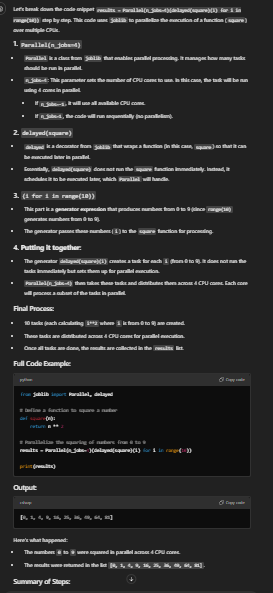

In [48]:
x_test = scaler.fit_transform(x_test)

In [49]:
x_test

array([[-0.28826001, -1.16979294, -0.14336818],
       [-1.03297566, -1.16979294, -0.53261992],
       [-0.28826001, -0.41133965, -0.37832193],
       ...,
       [-0.28826001, -0.41133965, -0.13635464],
       [-1.03297566, -1.16979294, -0.52429133],
       [ 1.94588692,  0.34711363,  0.15383078]])

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [51]:
lr.fit(x_train, y_train)

LinearRegression()

In [53]:
predictions = lr.predict(x_test)

In [54]:
from sklearn.metrics import mean_absolute_error

In [59]:
mean_absolute_error(y_test, predictions).astype(int)

np.int64(365108)

In [61]:
# mean value is kinna close 
# but 50% value much closer
data["price"].describe().astype(int)

count       1355862
mean         574225
std         2212087
min               0
25%          239000
50%          379000
75%          600000
max      2147483600
Name: price, dtype: int64

In [62]:
joblib.dump(lr, "model.pkl")

['model.pkl']